In [100]:
# imports 
import pandas as pd
import numpy
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [78]:
# preprocessing and perparing data
data = []
with open('final.csv.xls',encoding='utf-8') as csv_file:
    for row in csv_file:
        row = row[1:]
        number = ''
        title = ''
        tag = ''
        if '""' in row:
            try:
                index1 = row.index('""')
                index2 = row.index('",')
                number = row[:index1-1]
                title = row[index1+2:index2-1]
                tag = row[index2+2:]

                title = title.replace(',','')

                row = number +','+ title +','+ tag
                row = row.split(',')
            except:
                continue
        else:
            row = row.split(',')
        
        row[2] = row[2].replace('"\n','')
        data.append(row)

In [79]:
data1 = data.copy()
column_names = data1.pop(0)
df = pd.DataFrame(data1,columns=['Number','Title','Tag'])
df = df.drop(columns = ['Number'])

In [80]:
# perparing a dictionary of words along with there labels and vice versa

d = {ni: indi for indi, ni in enumerate(set(df['Tag']))}
labels = [d[ni] for ni in df['Tag']]

dictionary = {indi: ni for indi, ni in enumerate(set(df['Tag']))}
print(dictionary)


{0: '', 1: 'chelsea', 2: 'hashtag', 3: 'railgun', 4: "assassin's", 5: 'mole', 6: 'lae', 7: 'gun', 8: '神烦xp', 9: 'hamish', 10: "latoya's", 11: 'winchester', 12: '奔跑吧兄弟20180518', 13: 'garand', 14: 'shaytards', 15: '周杰倫', 16: 'tati', 17: 'garry', 18: '171208__tb03foxfriendsbp', 19: 'edgy', 20: 'jesus', 21: 'mlive', 22: 'shaymien', 23: 'happytime', 24: 'allaroundaudrey', 25: 'bun', 26: 'tap', 27: 'klpolish', 28: 'gravity', 29: 'mama', 30: 'cuban', 31: 'screenjunkies', 32: 'peep', 33: 'love', 34: 'sp:dt=2018-04-29t18:56:43+00:00', 35: 'mmanytt', 36: 'esl', 37: '171229__tb01reproductivefights_1', 38: 'bully', 39: 'exploring', 40: 'huawei', 41: 'whoopi', 42: 'pizza', 43: '美食', 44: 'khamoshi', 45: '68', 46: 'party', 47: 'elevator', 48: "90's", 49: 'poo', 50: 'lyricalhub', 51: 'slapjack', 52: 'عوالم', 53: 'corsair', 54: 'chadwick', 55: 'destroying', 56: 'sonic', 57: 'roody', 58: 'semi', 59: 'justin', 60: 'acoustic', 61: 'sway', 62: 'verne', 63: 'dar', 64: 'pokimane', 65: 'savage', 66: 'entertai

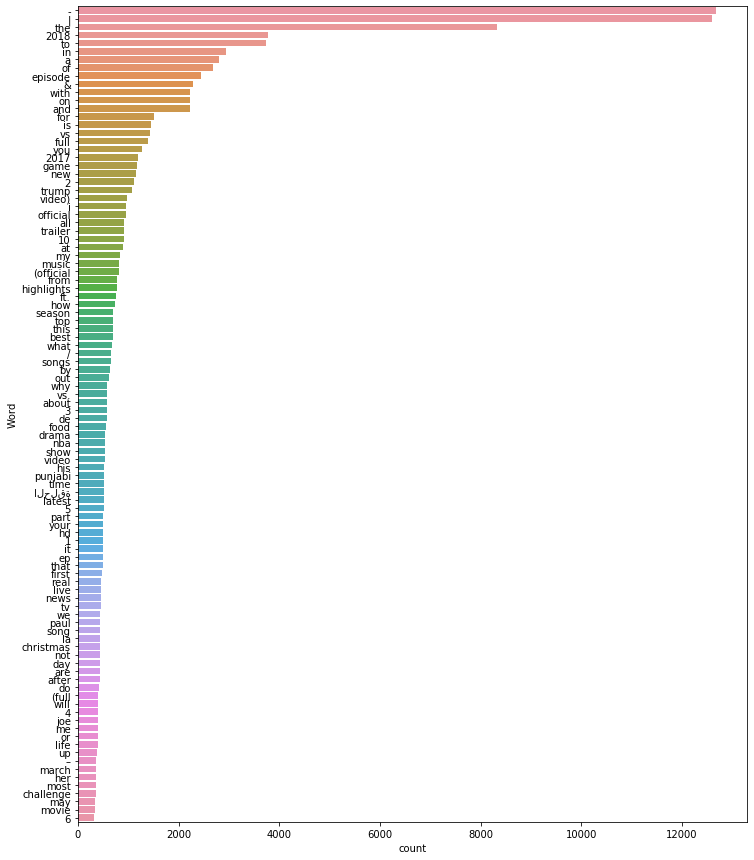

In [104]:
'''
A tag for word frequency. 
'''

def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

# selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
    
# visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

# print 100 most frequent words 
freq_words(df['Title'], 100)

C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35222 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Ahsan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21127 missing from curre

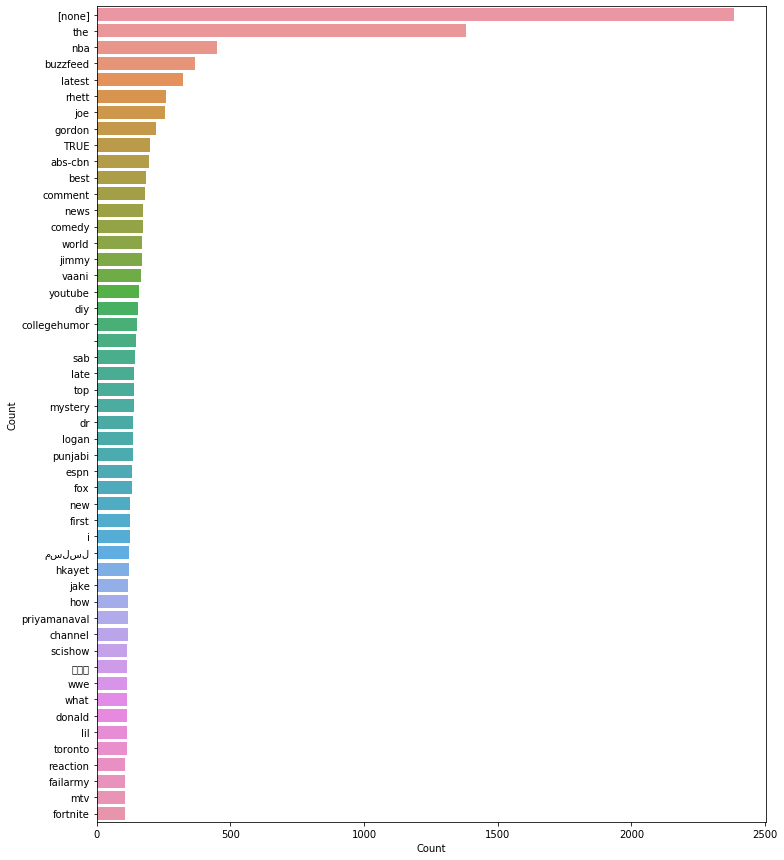

In [105]:
'''
A graph for Tag Frequecy
'''


genres = [] 

# extract genres
for i in df['Tag']: 
    genres.append([i]) 

# add to 'movies' dataframe  
df['Tags'] = genres

all_genres = sum(genres,[])
len(set(all_genres))

all_genres = nltk.FreqDist(all_genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [81]:
df['labels'] = labels

In [82]:
df

,Title,Tag,labels
0,eminem - walk on water (audio) ft. beyoncé,eminem,2418
1,plush - bad unboxing fan mail,plush,4131
2,racist superman | rudy mancuso king bach & lel...,racist,3370
3,i dare you: going bald!?,ryan,1277
4,ed sheeran - perfect (official music video),edsheeran,1506
...,...,...,...
40869,how2: how to solve a mystery,annoying,3410
40870,eli lik lik episode 13 partie 01,hkayet,3418
40871,kingdom hearts iii – square enix e3 showcase 2...,kingdom,861
40872,trump advisor grovels to trudeau,180612__tb02sorryexcuse,980


In [83]:
# removing punctuation
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct
df['Clean_Title'] = df['Title'].apply(lambda x: remove_punct(x))

In [84]:
# generating tokens
import string
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in df.Clean_Title]

In [85]:
# converting every letter to lower case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [86]:
# removing stop words
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
df['Final_Title'] = [' '.join(sen) for sen in filtered_words]
df['tokens'] = filtered_words

In [87]:
df

,Title,Tag,labels,Clean_Title,Final_Title,tokens
0,eminem - walk on water (audio) ft. beyoncé,eminem,2418,eminem walk on water audio ft beyoncé,eminem walk water audio ft beyoncé,"[eminem, walk, water, audio, ft, beyoncé]"
1,plush - bad unboxing fan mail,plush,4131,plush bad unboxing fan mail,plush bad unboxing fan mail,"[plush, bad, unboxing, fan, mail]"
2,racist superman | rudy mancuso king bach & lel...,racist,3370,racist superman rudy mancuso king bach lele ...,racist superman rudy mancuso king bach lele pons,"[racist, superman, rudy, mancuso, king, bach, ..."
3,i dare you: going bald!?,ryan,1277,i dare you going bald,dare going bald,"[dare, going, bald]"
4,ed sheeran - perfect (official music video),edsheeran,1506,ed sheeran perfect official music video,ed sheeran perfect official music video,"[ed, sheeran, perfect, official, music, video]"
...,...,...,...,...,...,...
40869,how2: how to solve a mystery,annoying,3410,how2 how to solve a mystery,how2 solve mystery,"[how2, solve, mystery]"
40870,eli lik lik episode 13 partie 01,hkayet,3418,eli lik lik episode 13 partie 01,eli lik lik episode 13 partie 01,"[eli, lik, lik, episode, 13, partie, 01]"
40871,kingdom hearts iii – square enix e3 showcase 2...,kingdom,861,kingdom hearts iii – square enix e3 showcase 2...,kingdom hearts iii – square enix e3 showcase 2...,"[kingdom, hearts, iii, –, square, enix, e3, sh..."
40872,trump advisor grovels to trudeau,180612__tb02sorryexcuse,980,trump advisor grovels to trudeau,trump advisor grovels trudeau,"[trump, advisor, grovels, trudeau]"


In [88]:
# train test split 90 - 10 %
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Final_Title'],df['labels'],test_size=0.1)

In [47]:
'''
code for one hot encoding which you can use but label encoding gives better results
'''

# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# def onehot(df):
#     values = array(df)

#     # integer encode
#     label_encoder = LabelEncoder()
#     integer_encoded = label_encoder.fit_transform(values)

#     # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False)
#     integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#     onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

#     return label_encoder, onehot_encoded



# train_label_encoder, train_onehot = onehot(Test_X)
# test_label_encoder, test_onehot = onehot(Test_Y)

In [89]:
# vectorizing the labels and the titles
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Final_Title'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [90]:
print(Tfidf_vect.vocabulary_)

{'eminem': 1409, 'walk': 4508, 'water': 4536, 'audio': 398, 'ft': 1714, 'beyoncé': 538, 'bad': 450, 'unboxing': 4393, 'fan': 1545, 'mail': 2634, 'racist': 3411, 'superman': 4084, 'rudy': 3627, 'mancuso': 2656, 'king': 2379, 'bach': 441, 'lele': 2507, 'pons': 3290, 'dare': 1124, 'going': 1814, 'ed': 1378, 'sheeran': 3811, 'perfect': 3197, 'official': 3055, 'music': 2913, 'video': 4460, 'superhero': 4083, 'school': 3721, 'new': 2982, 'students': 4046, 'want': 4514, 'talk': 4137, 'marriage': 2691, 'made': 2626, 'history': 2007, 'lol': 2569, 'finally': 1607, 'sheldon': 3813, 'winning': 4596, 'argument': 356, 'existence': 1493, 'god': 1810, '12': 20, 'weird': 4555, 'ways': 4539, 'sneak': 3913, 'food': 1656, 'class': 898, 'back': 445, 'pranks': 3316, 'youtubers': 4688, 'react': 3456, 'top': 4287, '10': 9, 'twitter': 4370, 'time': 4257, 'spy': 3978, 'help': 1979, 'fake': 1533, 'pet': 3207, 'smart': 3903, 'employee': 1417, 'prank': 3315, 'jason': 2214, 'momoa': 2860, 'hugh': 2059, 'grant': 184

In [ ]:
'''
General Observation:

The more you increase 'c' in these algorithms, it inceases the accuracy.
'''

In [64]:
# Naive Bayes
# alpha parameter: Additive (Laplace/Lidstone) smoothing parameter

Naive = naive_bayes.MultinomialNB(alpha=0.0001)

Naive.fit(Train_X_Tfidf,Train_Y)

predictions_NB = Naive.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  70.30332681017613


In [70]:
print(dictionary[predictions_NB[18]])
print(dictionary[df['labels'][Test_Y.index[18]]])

daily
daily


In [99]:
'''
SVM
SVM parameters
Cfloat, optional (default=1.0)
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernelstring, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
'''

SVM = svm.SVC(C=10.0,kernel='rbf', degree=3, gamma=1)
SVM.fit(Train_X_Tfidf,Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  76.71232876712328


In [98]:
print(dictionary[predictions_SVM[18]])
print(dictionary[df['labels'][Test_Y.index[18]]])

[none]
faze


In [101]:
# Random Forest Classifier
clf = DecisionTreeClassifier()

clf.fit(Train_X_Tfidf,Train_Y)

predictions_RF = clf.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

SVM Accuracy Score ->  75.293542074364


In [102]:
print(dictionary[predictions_RF[18]])
print(dictionary[df['labels'][Test_Y.index[18]]])

faze
faze


In [91]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

In [94]:
'''
Logistic Regression
C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.
Penalty: l1 or l2
'''

lr = LogisticRegression(penalty='l2',C=10.0)
clf = OneVsRestClassifier(lr)

In [95]:
clf.fit(Train_X_Tfidf,Train_Y)

C:\Users\Ahsan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ahsan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

OneVsRestClassifier(estimator=LogisticRegression(C=10.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [96]:
y_pred = clf.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)

Naive Bayes Accuracy Score ->  73.40998043052838
